In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests
import os
import tweepy
import io
import json

%matplotlib inline

# Gathering Data

### Reading tweets_archive and images.tsv 

In [2]:
# Reading the tweets archive csv file and images.tsv
tweets_df = pd.read_csv('twitter-archive-enhanced.csv').sort_values('timestamp',ascending=False)

# Getting the tweets ids
tweets_ids = tweets_df['tweet_id']

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_file = requests.get(url).content
images_df = pd.read_csv(io.BytesIO(image_file), sep='\t')



### Writing tweets data into tweets_json.txt file

In [3]:
# Getting keys and intializing API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit = True, wait_on_rate_limit_notify=True)

In [4]:
# Writing tweets data into a json file
count = 0
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt','w') as file:
        for i in tweets_ids.values:
            count += 1
            print('tweet No.' + str(count) + '  ' +  str(i) + ': ')
            try:
                tweet = api.get_status(i)
                print(tweet.text)
                json.dump(tweet._json, file)
                file.write('\n')
            except:
                print('Tweet is not found or could not be accessed')
                pass


### Reading tweets_json.txt data into a new DataFrame

In [5]:
# Reading the tweet_json.txt

tweet_json_list = []
with open('tweet_json.txt','r') as tjson:
    for line in tjson.readlines():
        tweet = json.loads(line)
        tweet_json_list.append({'tweet_id':tweet['id'], 'favorite_count':tweet['favorite_count']
                               , 'retweet_count':tweet['retweet_count']})
tweets_json_df = pd.DataFrame(tweet_json_list,columns=['tweet_id','favorite_count','retweet_count'])
tweets_json_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35712,7550
1,892177421306343426,30871,5594
2,891815181378084864,23210,3705
3,891689557279858688,39005,7731
4,891327558926688256,37258,8332


## Assessing Data

### Assessing twitter_archive file

In [6]:
tweets_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
tweets_df.duplicated().sum()

0

In [9]:
tweets_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
tweets_df[tweets_df['expanded_urls'].isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [11]:
tweets_df[tweets_df['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [12]:
tweets_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
tweets_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
tweets_df.name.value_counts(sort=True)

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Lola            10
Penny           10
Tucker          10
Bo               9
Winston          9
Sadie            8
the              8
Toby             7
Bailey           7
an               7
Daisy            7
Buddy            7
Jax              6
Stanley          6
Leo              6
Oscar            6
Jack             6
Rusty            6
Bella            6
Scout            6
Milo             6
Koda             6
Dave             6
Larry            5
              ... 
Remy             1
Mabel            1
Glenn            1
Tess             1
Augie            1
William          1
Roscoe           1
Shakespeare      1
Tater            1
Pepper           1
Molly            1
Bobble           1
Tango            1
all              1
Batdog           1
Furzey           1
Remus            1
Loomis           1
Cheryl           1
Tuck             1
Mary             1
Brutus      

In [15]:

tweets_df[tweets_df.name.isin(['a','an','None'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


#### Observations:

- [doggo, floofer, pupper, poppo] columns should be values of only one variable
- Removing None values from [doggo, floofer, pupper, poppo] columns
- Remove rows with retweets values
- Remove rows replys values
- It is better to make tweet_id a string value ( Categorical data )
- Convert timestamp to date_tine objects
- Some tweets have no expanded urls
- Some ratings need to be fixed
- some names need to be fixed
- Some dogs have more than one dog class

### Assessing images_predictions file

In [16]:
images_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
images_df.shape

(2075, 12)

In [18]:
tweets_df.shape

(2356, 17)

#### Observations :
- p[1,2,3] , p[1,2,3]_conf, p[1,2,3]_dog need to be fixed
- Some tweets do not have images ( from the shape of both dfs )
- Merge images_df and tweets_df
- Convert type of tweet ID and algorithm number after tidiness

### Assessing  tweets_json_df

In [19]:
tweets_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [20]:
tweets_json_df.duplicated().sum()

0

In [21]:
tweets_json_df.shape

(2331, 3)

In [22]:
tweets_json_df['favorite_count'].value_counts()

0        163
906        4
2606       3
495        3
853        3
2145       3
1342       3
4208       3
2011       3
631        3
180        3
1054       3
1130       3
3172       3
2387       3
1050       3
2381       3
220        3
323        3
1577       3
1371       2
1611       2
1319       2
7541       2
1247       2
822        2
647        2
2589       2
9823       2
1249       2
        ... 
2618       1
567        1
2785       1
70195      1
519        1
21001      1
18954      1
8715       1
6668       1
4621       1
527        1
2576       1
2582       1
27160      1
2586       1
4618       1
10782      1
4639       1
6688       1
545        1
6690       1
4643       1
1241       1
2600       1
21037      1
559        1
934        1
561        1
23090      1
4051       1
Name: favorite_count, Length: 1987, dtype: int64

In [23]:
tweets_json_df.retweet_count.value_counts()

220      7
89       5
721      5
447      5
407      5
1119     4
369      4
545      4
1120     4
516      4
339      4
223      4
51       4
240      4
74       4
862      4
41       4
556      4
461      4
536      4
193      4
619      4
122      3
3033     3
1727     3
336      3
968      3
1932     3
281      3
632      3
        ..
375      1
387      1
2438     1
4487     1
2446     1
399      1
403      1
5871     1
327      1
323      1
265      1
10560    1
2314     1
267      1
2316     1
2318     1
275      1
277      1
5717     1
4381     1
4385     1
2338     1
295      1
301      1
303      1
305      1
4403     1
313      1
317      1
8192     1
Name: retweet_count, Length: 1674, dtype: int64

#### Observations:

- Variables (favorite_count and tweet_count) stored in multiple tables ( merge tweets_json_df and tweets_df )

## Cleaning Data 

### Creating copies of original dataframe

In [24]:
tweets_cleaned_df = tweets_df.copy()
images_clean_df = images_df.copy()

### Tweets that are retweets and replys and have no images

#### Define
- Remove tweets that are replys and retweets by selecting rows with NaN values
- Remove tweets with no expanded urls by droping NaN rows
- Dropping redundunt columns

#### Code

In [25]:
# Get indices of retweets, replys and expanded_urls
reply_index = list(tweets_df[tweets_df['in_reply_to_status_id'].notna()].index)
retweet_index = list(tweets_df[tweets_df['retweeted_status_id'].notna()].index)
expurl_index = list(tweets_df[tweets_df['expanded_urls'].isna()].index) 
del_index = list(set(reply_index + retweet_index + expurl_index))

# Get columns to be removed
del_cols = ['retweeted_status_id','in_reply_to_user_id','retweeted_status_id',
            'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id']

# drop indicies and columns
tweets_cleaned_df = tweets_cleaned_df.drop(del_index, axis=0).reset_index(drop=True)
tweets_cleaned_df = tweets_cleaned_df.drop(del_cols, axis=1)



#### Test

In [26]:
tweets_cleaned_df.info()
tweets_cleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 196.4+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Fixing tidiness issue of [doggo, floofer, pupper, poppo] 

#### Define

- Replace NaN with empty string
- Concatenate the four columns in a new column
- Drop old columns
- Repalce empty with NaN 

#### Code

In [27]:
# Columns to be removed
dogs_classes = ['doggo', 'floofer', 'pupper', 'puppo'] 

# Replacing None with empty string
for cls in dogs_classes:
    tweets_cleaned_df[cls]=tweets_cleaned_df[cls].replace('None','')

# Concatenating four columns into one and dropping them
tweets_cleaned_df['dogs_class'] = tweets_cleaned_df['doggo'] + tweets_cleaned_df['floofer'] + tweets_cleaned_df['pupper'] + tweets_cleaned_df['puppo']
tweets_cleaned_df = tweets_cleaned_df.drop(dogs_classes,axis=1)
tweets_cleaned_df['dogs_class'].replace('', np.nan,inplace=True)

#### Test

In [28]:
tweets_cleaned_df.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_class
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### Tidiness issue of images prediction


#### Define

- [p,conf,p_dog] columns should be in only three columns

#### Code

In [29]:
# Renaming images Columns
images_df.columns = ['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'conf_1', 'result_1', 'prediction_2',
       'conf_2', 'result_2', 'prediction_3', 'conf_3', 'result_3']

# Tidiness issue of the images_df 
images_clean_df = pd.wide_to_long(images_df,stubnames=['prediction_','conf_','result_'], i='tweet_id', j='Number').reset_index()

#### Test

In [30]:
images_clean_df.head()

,tweet_id,Number,jpg_url,img_num,prediction_,conf_,result_
0,666020888022790149,1,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,1,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,1,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,1,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


### First Prediction Issue
- There are cases where the first algorithm doesn't predict a dog breed, but the second or the third one does. So, We are going to slice and compare the three predictions and take the first one that predicts a dog breed. If all the algorithms do not detect a dog breed, we choose the one with highest confidence

#### Define


- Slice the first, second and third predictions
- Compare them with predictions of the first one and has False result
- Replace the first True result from the second one, if not then the third, else keep the first result

#### Code

In [31]:
# First Prediction fails to detect a dog breed 
first_prdct = images_clean_df[ (~images_clean_df.result_) & (images_clean_df.Number == 1) ].reset_index(drop=True)
first_prdct_ids = list(first_prdct.tweet_id.values)

# Second Prediction of the failed first ones
second_prdct = images_clean_df[ (images_clean_df.tweet_id.apply(lambda x,*y: True if x in y else False,args=first_prdct_ids)) & (images_clean_df.Number == 2)].set_index('tweet_id')

# Third Prediction of the failed first ones
third_prdct = images_clean_df[(images_clean_df.tweet_id.apply(lambda x,*y: True if x in y else False,args=first_prdct_ids)) & (images_clean_df.Number == 3)].set_index('tweet_id')

In [32]:
# Drop the duplicate tweets from original dataframe
images_clean_df.drop_duplicates(subset=['tweet_id'],inplace=True)

images_clean_df.set_index('tweet_id',inplace=True)
for tweet in first_prdct_ids:
    # if the second algorithm predicts a breed then we replace its result with the first
    if second_prdct.loc[tweet,'result_']:
        images_clean_df.loc[tweet] = second_prdct.loc[tweet]
    # if the third algorithm predicts a breed then we replace its result with the first
    elif third_prdct.loc[tweet,'result_']:
        images_clean_df.loc[tweet] = third_prdct.loc[tweet]

images_clean_df.reset_index(inplace=True)


#### Test

In [33]:
images_clean_df.info()
images_clean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 7 columns):
tweet_id       2075 non-null int64
Number         2075 non-null int64
jpg_url        2075 non-null object
img_num        2075 non-null int64
prediction_    2075 non-null object
conf_          2075 non-null float64
result_        2075 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 99.4+ KB


,tweet_id,Number,jpg_url,img_num,prediction_,conf_,result_
0,666020888022790149,1,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,1,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,1,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,1,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


### Merging dataframes

#### Define

- Remove tweets with no images and predictions
- Remove tweets with no favorite or retweet counts (deleted)

#### Code

In [34]:
# Removing deleted tweets by merging with tweets from json file
temp_df = pd.merge(tweets_cleaned_df, tweets_json_df, on='tweet_id', how='inner')

# Removing tweets with no images by merging with images_clean_df
tweets_cleaned_df = pd.merge(temp_df,images_clean_df, on='tweet_id', how='inner')

#### Test


In [35]:
tweets_cleaned_df.info()
tweets_cleaned_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 17 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
dogs_class            302 non-null object
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
Number                1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
prediction_           1964 non-null object
conf_                 1964 non-null float64
result_               1964 non-null bool
dtypes: bool(1), float64(1), int64(7), object(8)
memory usage: 262.8+ KB


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_class,favorite_count,retweet_count,Number,jpg_url,img_num,prediction_,conf_,result_
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,35712,7550,1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,30871,5594,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,23210,3705,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,39005,7731,2,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,True
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,37258,8332,1,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,18784,2794,1,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,10911,1814,1,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,60186,16893,1,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,25832,3848,1,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,29497,6568,1,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True


### Fixing the data types of ids, timestamp and algorithm numbers

#### Define

- Convert ids to string
- Convert predictio number to string
- Convert timestamp to datetime

#### Code

In [36]:
# Converting tweets ids and algorithm number to str
tweets_cleaned_df.tweet_id = tweets_cleaned_df.tweet_id.astype(str)
tweets_cleaned_df.Number = tweets_cleaned_df.Number.astype(str)

# Converting timestamp to datetime
tweets_cleaned_df.timestamp = pd.to_datetime(tweets_cleaned_df.timestamp)


#### Test

In [37]:
tweets_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 17 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
dogs_class            302 non-null object
favorite_count        1964 non-null int64
retweet_count         1964 non-null int64
Number                1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null int64
prediction_           1964 non-null object
conf_                 1964 non-null float64
result_               1964 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(9)
memory usage: 262.8+ KB


### Checking names and rating after merging dataframes

#### Define

- Replace lowercase names with NaN

In [38]:
tweets_cleaned_df['name'].value_counts()

None         524
a             55
Oliver        10
Charlie       10
Cooper        10
Penny          9
Tucker         9
Lucy           9
Winston        8
Sadie          8
the            7
Lola           7
Daisy          7
Toby           7
Bella          6
an             6
Stanley        6
Jax            6
Koda           6
Bo             6
Oscar          5
Dave           5
Louis          5
Buddy          5
Chester        5
Bailey         5
Scout          5
Rusty          5
Leo            5
Milo           5
            ... 
Rocco          1
Bruno          1
Bonaparte      1
Molly          1
Tango          1
all            1
Tedrick        1
Mingus         1
Damon          1
Pluto          1
Bode           1
Kobe           1
Ivar           1
Rooney         1
Grizz          1
Jackie         1
Dobby          1
Jessiga        1
Jazzy          1
Coopson        1
Chef           1
Kota           1
Grady          1
Lizzie         1
Gerbald        1
Jerome         1
Stella         1
Caryl         

#### Code

In [39]:
# Replacing None with nan
tweets_cleaned_df['name'].replace('None',np.nan,inplace=True)
tweets_cleaned_df['name'].replace('a',np.nan,inplace=True)
tweets_cleaned_df['name'].replace('an',np.nan,inplace=True)
tweets_cleaned_df['name'].replace('the',np.nan,inplace=True)

#### Test

In [40]:
tweets_cleaned_df['name'].value_counts()

Charlie      10
Cooper       10
Oliver       10
Penny         9
Tucker        9
Lucy          9
Winston       8
Sadie         8
Daisy         7
Lola          7
Toby          7
Bo            6
Stanley       6
Koda          6
Jax           6
Bella         6
Buddy         5
Dave          5
Chester       5
Scout         5
Leo           5
Bailey        5
Oscar         5
Louis         5
Milo          5
Rusty         5
one           4
Larry         4
Clarence      4
George        4
             ..
Colin         1
Shooter       1
Rocco         1
Bruno         1
Bonaparte     1
Molly         1
Tango         1
Damon         1
Meatball      1
Dotsy         1
Bowie         1
Saydee        1
Pluto         1
Grady         1
Stewie        1
Ivar          1
Tedrick       1
Grizz         1
Jackie        1
Jessiga       1
Caryl         1
Jazzy         1
Bode          1
Coopson       1
Steve         1
Lizzie        1
Gerbald       1
Jerome        1
Stella        1
Fiji          1
Name: name, Length: 929,

### Checking dogs ratings

### Get indices

- index of tweets with more than one dog and dogs count:
   [316,653,836,933,957,975,1039,1114,1282,1413,1471]
- index of non-dog ratings tweets:
    [378,788]
- Fix rating extraction:
[878,912,1307,1943]

#### Define

- Check tweets text for rating and categorize each tweet
- Fix tweets with more than one dog by dividing over number of dogs


#### Code

In [41]:
# Fixing tweets ratings with more than one dog
fix_rating = [316,653,836,933,957,975,1039,1114,1282,1413,1471]
for index in fix_rating:
    div_by = tweets_cleaned_df.iloc[index,6] // 10
    tweets_cleaned_df.iloc[index,6] = tweets_cleaned_df.iloc[index,6] // div_by
    tweets_cleaned_df.iloc[index,5] = tweets_cleaned_df.iloc[index,5] // div_by

#### Test

In [42]:
tweets_cleaned_df.iloc[fix_rating]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_class,favorite_count,retweet_count,Number,jpg_url,img_num,prediction_,conf_,result_
316,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,12,10,NaN,NaN,12218,3214,1,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True
653,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,11,10,NaN,NaN,4751,2188,1,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_retriever,0.436377,True
836,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,12,10,this,NaN,3764,1237,1,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,0.501767,False
933,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,11,10,NaN,NaN,2779,721,1,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,0.371816,True
957,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,10,10,NaN,NaN,2259,546,1,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True
975,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,9,10,NaN,NaN,2396,630,1,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True
1039,704054845121142784,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,12,10,NaN,NaN,2870,897,1,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,True
1114,697463031882764288,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,11,10,NaN,NaN,3362,1373,1,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,0.999885,True
1282,684222868335505415,2016-01-05 04:00:18,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,11,10,NaN,NaN,3753,1332,1,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True
1413,677716515794329600,2015-12-18 05:06:23,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,12,10,NaN,NaN,2965,945,3,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,chow,0.025438,True


#### Deine

- Fix tweets with numbers that have similar format to the ratings with split

#### Code

In [43]:
# Fixing tweets with wrong rating extraction from the text
fix_rating = [878,912,1307,1943]
for index in fix_rating:
    tweet_text = tweets_cleaned_df.iloc[index,3]
    tweet_text = tweet_text.split('/')
    tweets_cleaned_df.iloc[index,5] = int(tweet_text[1][-2:].strip())
    tweets_cleaned_df.iloc[index,6] = int(tweet_text[2][:2].strip())

#### Test

In [44]:
tweets_cleaned_df.iloc[fix_rating]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_class,favorite_count,retweet_count,Number,jpg_url,img_num,prediction_,conf_,result_
878,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,NaN,NaN,4021,1528,1,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True
912,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,NaN,2331,204,1,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True
1307,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,NaN,36104,16120,2,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,Chihuahua,0.155207,True
1943,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,NaN,NaN,133,58,1,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True


#### Define

- Drop non-rating tweets

#### Code

In [45]:
# Drop non-dog rating tweets
tweets_cleaned_df = tweets_cleaned_df.drop([378,788],axis=0).reset_index(drop=True)

#### Test

In [46]:
tweets_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 17 columns):
tweet_id              1962 non-null object
timestamp             1962 non-null datetime64[ns]
source                1962 non-null object
text                  1962 non-null object
expanded_urls         1962 non-null object
rating_numerator      1962 non-null int64
rating_denominator    1962 non-null int64
name                  1371 non-null object
dogs_class            302 non-null object
favorite_count        1962 non-null int64
retweet_count         1962 non-null int64
Number                1962 non-null object
jpg_url               1962 non-null object
img_num               1962 non-null int64
prediction_           1962 non-null object
conf_                 1962 non-null float64
result_               1962 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(5), object(9)
memory usage: 247.2+ KB


### Fixing the occurences of multiple dog classes

#### Define

- Check the text of the tweet of every multple class
- Exclude tweets with more than one dog from the analysis (NaN)
- Fix the class of the remaining dogs

In [47]:
tweets_cleaned_df[tweets_cleaned_df.dogs_class == 'doggopuppo']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_class,favorite_count,retweet_count,Number,jpg_url,img_num,prediction_,conf_,result_
145,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggopuppo,43969,17114,1,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True


In [48]:
tweets_cleaned_df[tweets_cleaned_df.dogs_class == 'doggofloofer']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_class,favorite_count,retweet_count,Number,jpg_url,img_num,prediction_,conf_,result_
151,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggofloofer,15663,3002,1,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,English_springer,0.354733,True


In [49]:
tweets_cleaned_df[tweets_cleaned_df.dogs_class == 'doggopupper']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_class,favorite_count,retweet_count,Number,jpg_url,img_num,prediction_,conf_,result_
333,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggopupper,10782,2682,1,https://pbs.twimg.com/ext_tw_video_thumb/81777...,1,curly-coated_retriever,0.733256,True
389,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggopupper,8856,2222,1,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,golden_retriever,0.426183,True
416,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggopupper,8134,2110,1,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,dalmatian,0.823356,True
501,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggopupper,7893,2247,1,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False
642,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggopupper,5913,1885,1,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,True
693,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,doggopupper,4342,1087,1,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,0.868304,True
782,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggopupper,9369,3033,1,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True
827,733109485275860992,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,NaN,doggopupper,49235,16457,1,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True


### From the text:
- floofer [151]
- puppo [145]
- doggo [333, 501]
- pupper [416]
- ambiguous [389, 642, 693, 782, 827]
- All to check [389, 642, 693, 782, 827,151,145,333,501,416]

#### Code

In [50]:
# Fixing some dogs classes
tweets_cleaned_df.iloc[151,8] = 'floofer'
tweets_cleaned_df.iloc[145,8] = 'puppo'
tweets_cleaned_df.iloc[[333,501],8] = 'doggo'
tweets_cleaned_df.iloc[416,8] = 'pupper'
tweets_cleaned_df.iloc[[389, 642, 693, 782, 827],8] = np.nan

#### Test


In [51]:
tweets_cleaned_df.iloc[[389, 642, 693, 782, 827,151,145,333,501,416]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_class,favorite_count,retweet_count,Number,jpg_url,img_num,prediction_,conf_,result_
389,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,NaN,8856,2222,1,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,golden_retriever,0.426183,True
642,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,NaN,5913,1885,1,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,True
693,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,NaN,4342,1087,1,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,0.868304,True
782,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,NaN,9369,3033,1,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True
827,733109485275860992,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,NaN,NaN,49235,16457,1,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True
151,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,floofer,15663,3002,1,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,English_springer,0.354733,True
145,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,puppo,43969,17114,1,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True
333,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,10782,2682,1,https://pbs.twimg.com/ext_tw_video_thumb/81777...,1,curly-coated_retriever,0.733256,True
501,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,7893,2247,1,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False
416,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,pupper,8134,2110,1,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,dalmatian,0.823356,True


## Storing Files

In [52]:
# Store the downloaded programatically file
images_df.to_csv('image_predictions.tsv', sep='\t', index_label=False)

# Store the tweets_archived_master
tweets_cleaned_df.to_csv('twitter_archive_master.csv', index_label=False)

## Analysis and Visualization

### Let's see how people react to different dog classes


- Most of people have puppers and doggos
- It is obvious from the visualization that people are most likely to react to tweets with poppo and doggo in them
- We can see puppo tweets had most likes on average, but doggo retweets on average are roughly more than that of puppos
- So, the most popular dogs classess are puppos and doggos
- From my opinion the fact that people are more likely to react to puppers as they are smaller and look cuter 

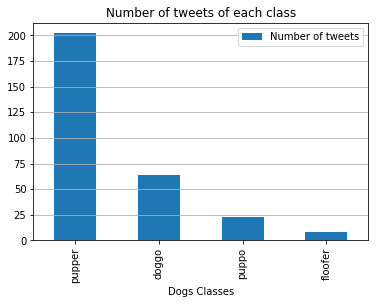

In [53]:
# Visualizing number of tweets about dogs classes

count_class_df = tweets_cleaned_df.groupby('dogs_class').count()[['tweet_id']].sort_values('tweet_id',ascending=False)
count_class_df.plot(kind='bar')
plt.xlabel('Dogs Classes')
plt.legend(['Number of tweets'])
plt.title('Number of tweets of each class')
plt.grid(axis='y')
plt.show()

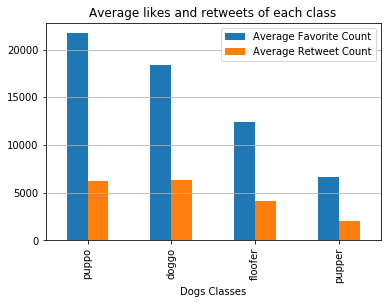

In [54]:
# Visualizing averge number of likes and retweets of dog classes

class_average_df=tweets_cleaned_df.groupby('dogs_class')[['favorite_count','retweet_count']].mean().sort_values(by=['favorite_count','retweet_count'],ascending=[False,False])
class_average_df.plot(kind='bar')
plt.xlabel('Dogs Classes')
plt.title('Average likes and retweets of each class')
plt.grid(axis='y')
plt.legend(labels=['Average Favorite Count','Average Retweet Count'])
plt.show()

### Let's see how people react to dog breeds

- The number of tweets with golden retriever is the highest which means that people most likely have golden retrivers
- However, although the golden retriver is most tweeted about we can't see the breed in the 12 most avergae breeds with likes and retweets.
- From the plot, people most commonly react to 'Bedlington terrier' breed that has highest likes and retweets
- From my point of view, the reason that golden retrievers have less likes and retweets on average may be a result of the fact that there are a lot of tweets about them or maybe people see other breeds way more less than golden retrievers so they are more likely to react to them
- Also, I think that golden retrievers are good friends as the majority of people have one

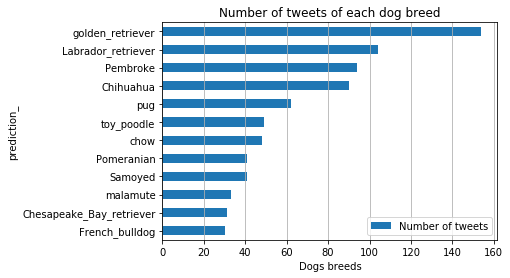

In [55]:
# Visualizing 10 most dog breeds with number of tweets
breeds_count_df = tweets_cleaned_df[tweets_cleaned_df.result_ == True].groupby('prediction_')[['tweet_id']].count().sort_values('tweet_id',ascending=True)[-12:]
breeds_count_df.plot(kind='barh')
plt.xlabel('Dogs breeds')
plt.legend(['Number of tweets'])
plt.title('Number of tweets of each dog breed')
plt.grid(axis='x')
plt.show()

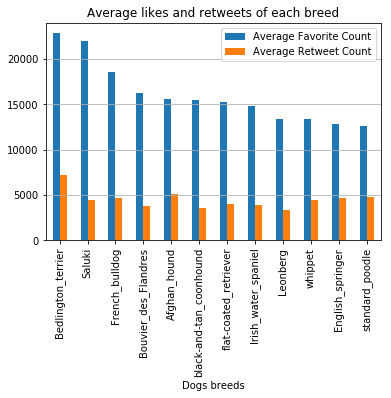

In [56]:
breeds_average_df = tweets_cleaned_df[tweets_cleaned_df.result_ == True].groupby('prediction_')[['favorite_count','retweet_count']].mean().sort_values(by=['favorite_count','retweet_count'],ascending=[False,False])[:12]
breeds_average_df.plot(kind='bar')
plt.xlabel('Dogs breeds')
plt.title('Average likes and retweets of each breed')
plt.legend(labels=['Average Favorite Count','Average Retweet Count'])
plt.grid(axis='y')
plt.show()